In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import sys
sys.path.append('../')
import degrade_photometry

In [3]:
catalog = Table.read('/global/cfs/cdirs/desi/users/cpayerne/data_WP221_Target_selection/COSMOS_11bands-SExtractor-Lephare.fits')

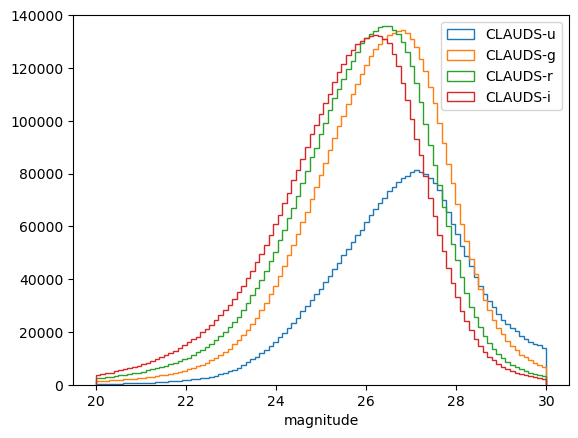

In [4]:
plt.hist(catalog['u'], bins=np.linspace(20, 30, 100), label = 'CLAUDS-u', histtype = 'step')
plt.hist(catalog['g'], bins=np.linspace(20, 30, 100), label = 'CLAUDS-g', histtype = 'step')
plt.hist(catalog['r'], bins=np.linspace(20, 30, 100), label = 'CLAUDS-r', histtype = 'step')
plt.hist(catalog['i'], bins=np.linspace(20, 30, 100), label = 'CLAUDS-i', histtype = 'step')
plt.ylim(0, 140000)
plt.xlabel('magnitude')
plt.legend()
plt.show()

In [5]:
mag_depth_r_deep = 26.6
mag_depth_r_shallow = 25.5
catalog_shallow = degrade_photometry.degrade(catalog, ['r'], [mag_depth_r_deep], [mag_depth_r_shallow], 'degraded')

/global/u2/c/cpayerne/WP221_Target_selection/notebooks/../degrade_photometry.py:9: RuntimeWarning: invalid value encountered in log10
  return 22.5 - 2.5 * np.log10(fluxs)


/tmp/ipykernel_1833479/3881178419.py:17: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values " ". Passing invalid values is deprecated since 3.4 and will become an error in 3.11.
  plt.hist(catalog_shallow['r_degraded'][mask_sel_detect], bins = bins,  color='darkorange', hatch='\ ', lw=2,


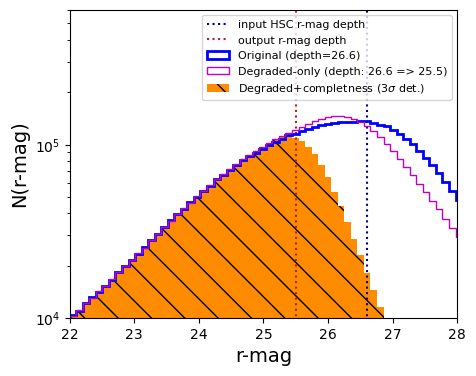

<Figure size 640x480 with 0 Axes>

In [69]:
from scipy.special import erf
plt.figure(figsize=(5,4), dpi=100)

plt.vlines(mag_depth_r_deep, 0, 1000000, ls=':',color='darkblue', label = 'input HSC r-mag depth')
plt.vlines(mag_depth_r_shallow, 0, 1000000, ls=':',
           color='firebrick', label = 'output r-mag depth')
bins = np.linspace(22, 30, 80)
plt.hist(catalog_shallow['r'], bins = bins, label = 'Original (depth=26.6)', 
         color = 'b', histtype='step', lw=2)
plt.hist(catalog_shallow['r_degraded'], bins = bins, label = 'Degraded-only (depth: 26.6 => 25.5)', 
         histtype='step', color = 'm')

c1 = degrade_photometry.Probability_detect_minput(catalog_shallow['r'], mag_depth_r_shallow, Nsigma=3)
rand = np.random.random(len(c1))
mask_sel_detect = rand < c1

plt.hist(catalog_shallow['r_degraded'][mask_sel_detect], bins = bins,  color='darkorange', hatch='\ ', lw=2, 
         label = r'Degraded+completness (3$\sigma$ det.)')
#
plt.legend(fontsize=8)
plt.xlabel('r-mag', fontsize=14)
plt.ylabel('N(r-mag)', fontsize=14)
plt.xlim(22, 28)
plt.ylim(1e4, 6e5)
plt.yscale('log')
plt.show()
plt.savefig(f'Nrmag.png', dpi = 300, bbox_inches='tight' )

In [80]:
r_edges = np.linspace(22, 28, 30)
mag_err_degraded = []
mag_err = []
for i in range(len(r_edges)-1):
    mask = (catalog_shallow['r_degraded'] > r_edges[i])*(catalog_shallow['r_degraded'] < r_edges[i+1])
    mag_err_degraded.append(np.median(catalog_shallow['r_degraded_err'][mask]))
    mag_err.append(np.median(catalog_shallow['r_err'][mask]))
    

/tmp/ipykernel_1833479/4179469191.py:18: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values " ". Passing invalid values is deprecated since 3.4 and will become an error in 3.11.
  plt.hist(catalog_shallow['r_degraded'][mask_sel_detect], bins = bins,  color='darkorange', hatch='\ ', lw=2,


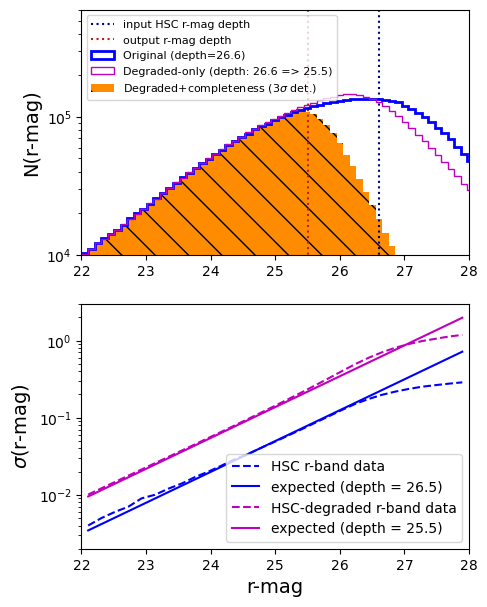

In [81]:
from scipy.special import erf
plt.figure(figsize=(5, 7), dpi=100)
plt.subplot(211)

plt.vlines(mag_depth_r_deep, 0, 1000000, ls=':',color='darkblue', label = 'input HSC r-mag depth')
plt.vlines(mag_depth_r_shallow, 0, 1000000, ls=':',
           color='firebrick', label = 'output r-mag depth')
bins = np.linspace(22, 30, 80)
plt.hist(catalog_shallow['r'], bins = bins, label = 'Original (depth=26.6)', 
         color = 'b', histtype='step', lw=2)
plt.hist(catalog_shallow['r_degraded'], bins = bins, label = 'Degraded-only (depth: 26.6 => 25.5)', 
         histtype='step', color = 'm')

c1 = degrade_photometry.Probability_detect_minput(catalog_shallow['r'], mag_depth_r_shallow, Nsigma=3)
rand = np.random.random(len(c1))
mask_sel_detect = rand < c1

plt.hist(catalog_shallow['r_degraded'][mask_sel_detect], bins = bins,  color='darkorange', hatch='\ ', lw=2, 
         label = r'Degraded+completeness (3$\sigma$ det.)')
#
plt.legend(fontsize=8)
#plt.xlabel('r-mag', fontsize=14)
plt.ylabel('N(r-mag)', fontsize=14)
plt.xlim(22, 28)
plt.ylim(1e4, 6e5)
plt.yscale('log')
#plt.show()
#plt.savefig(f'Nrmag.png', dpi = 300, bbox_inches='tight' )

plt.subplot(212)
#plt.figure(figsize=(5,4), dpi=100)
r_bin = [[r_edges[i], r_edges[i+1]] for i in range(len(r_edges)-1)]
plt.ylim(0.002, 3)

plt.plot(np.mean(r_bin, axis=1), mag_err, ls='--', color = 'b', label = 'HSC r-band data' )
plt.plot(np.mean(r_bin, axis=1), (2.5/np.log(10)) * 0.2 * 10**(0.4*(np.mean(r_bin, axis=1) - 26.6)), 'b', label = 'expected (depth = 26.5)' )

plt.plot(np.mean(r_bin, axis=1), mag_err_degraded, ls='--', color='m', label = 'HSC-degraded r-band data')
plt.plot(np.mean(r_bin, axis=1), (2.5/np.log(10)) * 0.2 * 10**(0.4*(np.mean(r_bin, axis=1) - 25.5)), 'm', label = 'expected (depth = 25.5)' )

plt.yscale('log')
plt.legend()
plt.xlabel('r-mag', fontsize=14)
plt.ylabel(r'$\sigma$(r-mag)', fontsize=14)
plt.xlim(22, 28)
#*plt.ylim(2e4, 6e5)
plt.yscale('log')
#plt.show()
plt.savefig(f'Nr_sigmar_mag.png', dpi = 300, bbox_inches='tight' )